# Lista 1 - Tarefa de classificação

## 1.	Importe as bibliotecas necessárias (pandas, matplotlib.pyplot, sklearn, etc.).

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Holdout
from sklearn.model_selection import train_test_split
# Normalzação
from sklearn.preprocessing import StandardScaler
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
# KNN
from sklearn.neighbors import KNeighborsClassifier
# Decision Tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
# Métricas
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

## 2.	Considere a primeira coluna como o índice do DataFrame e desconsidere a coluna “Product ID” e também a coluna “Failure Type

In [2]:
df= pd.read_csv("predictive_maintenance.csv")
df.set_index('UDI', inplace=True)
df.drop("Product ID", inplace= True, axis = 1)
df.drop("Failure Type", inplace= True, axis = 1)
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
UDI,,,,,,,
1,M,298.1,308.6,1551,42.8,0,0
2,L,298.2,308.7,1408,46.3,3,0
3,L,298.1,308.5,1498,49.4,5,0
4,L,298.2,308.6,1433,39.5,7,0
5,L,298.2,308.7,1408,40.0,9,0


## 3.	Faça o tratamento e exploração dos dados da maneira que achar mais conveniente (transformação, normalização, exclusão de dados faltantes, imputação de dados, binarização, etc).

In [3]:
## Checagem de Céluas Vazias
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  object 
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Target                   10000 non-null  int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 625.0+ KB


In [4]:
# replacing values
df['Type'].replace(['H', 'L', 'M'], [0, 1, 2], inplace=True)
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
UDI,,,,,,,
1,2,298.1,308.6,1551,42.8,0,0
2,1,298.2,308.7,1408,46.3,3,0
3,1,298.1,308.5,1498,49.4,5,0
4,1,298.2,308.6,1433,39.5,7,0
5,1,298.2,308.7,1408,40.0,9,0


## 4.	Prepare o modelo para a validação holdout, considerando 85% do conjunto para treinamento e parâmetro random¬_state = 5.

In [5]:
# Separar X e Y

X = df.drop("Target", axis = 1)
Y = df["Target"]

In [22]:
# Train Test Split

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.15, random_state=3)

In [23]:
df["Target"].value_counts()

0    9661
1     339
Name: Target, dtype: int64

In [24]:
from imblearn import under_sampling, over_sampling

# Reamostragem da classe menos favorecida (neste caso Target = 1)
over = over_sampling.RandomOverSampler(sampling_strategy=0.3)

X_over, y_over = over.fit_resample(X_train, y_train)

np.shape(X_over), np.shape(y_over)

y_over.value_counts()

0    8230
1    2469
Name: Target, dtype: int64

In [25]:
## Dados Normalizados

scaler = StandardScaler()
scaler.fit(X_train) #Compute the mean and std to be used for later scaling.
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

In [26]:
# Reamostragem da classe menos favorecida (neste caso Target = 1)
over = over_sampling.RandomOverSampler(sampling_strategy=0.3)

X_over_norm, y_over_norm = over.fit_resample(X_train_norm, y_train)

np.shape(X_over_norm), np.shape(y_over_norm)

y_over_norm.value_counts()

0    8230
1    2469
Name: Target, dtype: int64

## 5.	Use os métodos de árvores de decisão, floresta randômica e k-vizinhos mais próximos para classificar o conjunto.

In [27]:
dt = DecisionTreeClassifier(max_depth = 4)
rf = RandomForestClassifier()
knn = KNeighborsClassifier()

## Com Over Sampling

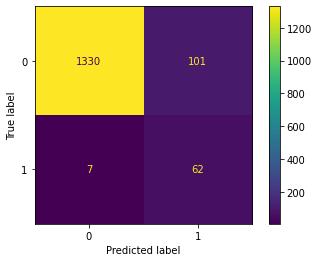

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      1431
           1       0.38      0.90      0.53        69

    accuracy                           0.93      1500
   macro avg       0.69      0.91      0.75      1500
weighted avg       0.97      0.93      0.94      1500



In [28]:
# Decision Tree

# Treinamento do Classificador (Utilizar o método .fit)
dt.fit(X_over, y_over)
pred_dt =dt.predict(X_test) ##Conjunto de Teste para predições
cm = confusion_matrix(y_test, pred_dt)
DspCM = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=dt.classes_)
DspCM.plot()
plt.show()

# Relatório

print(classification_report(y_test, pred_dt))

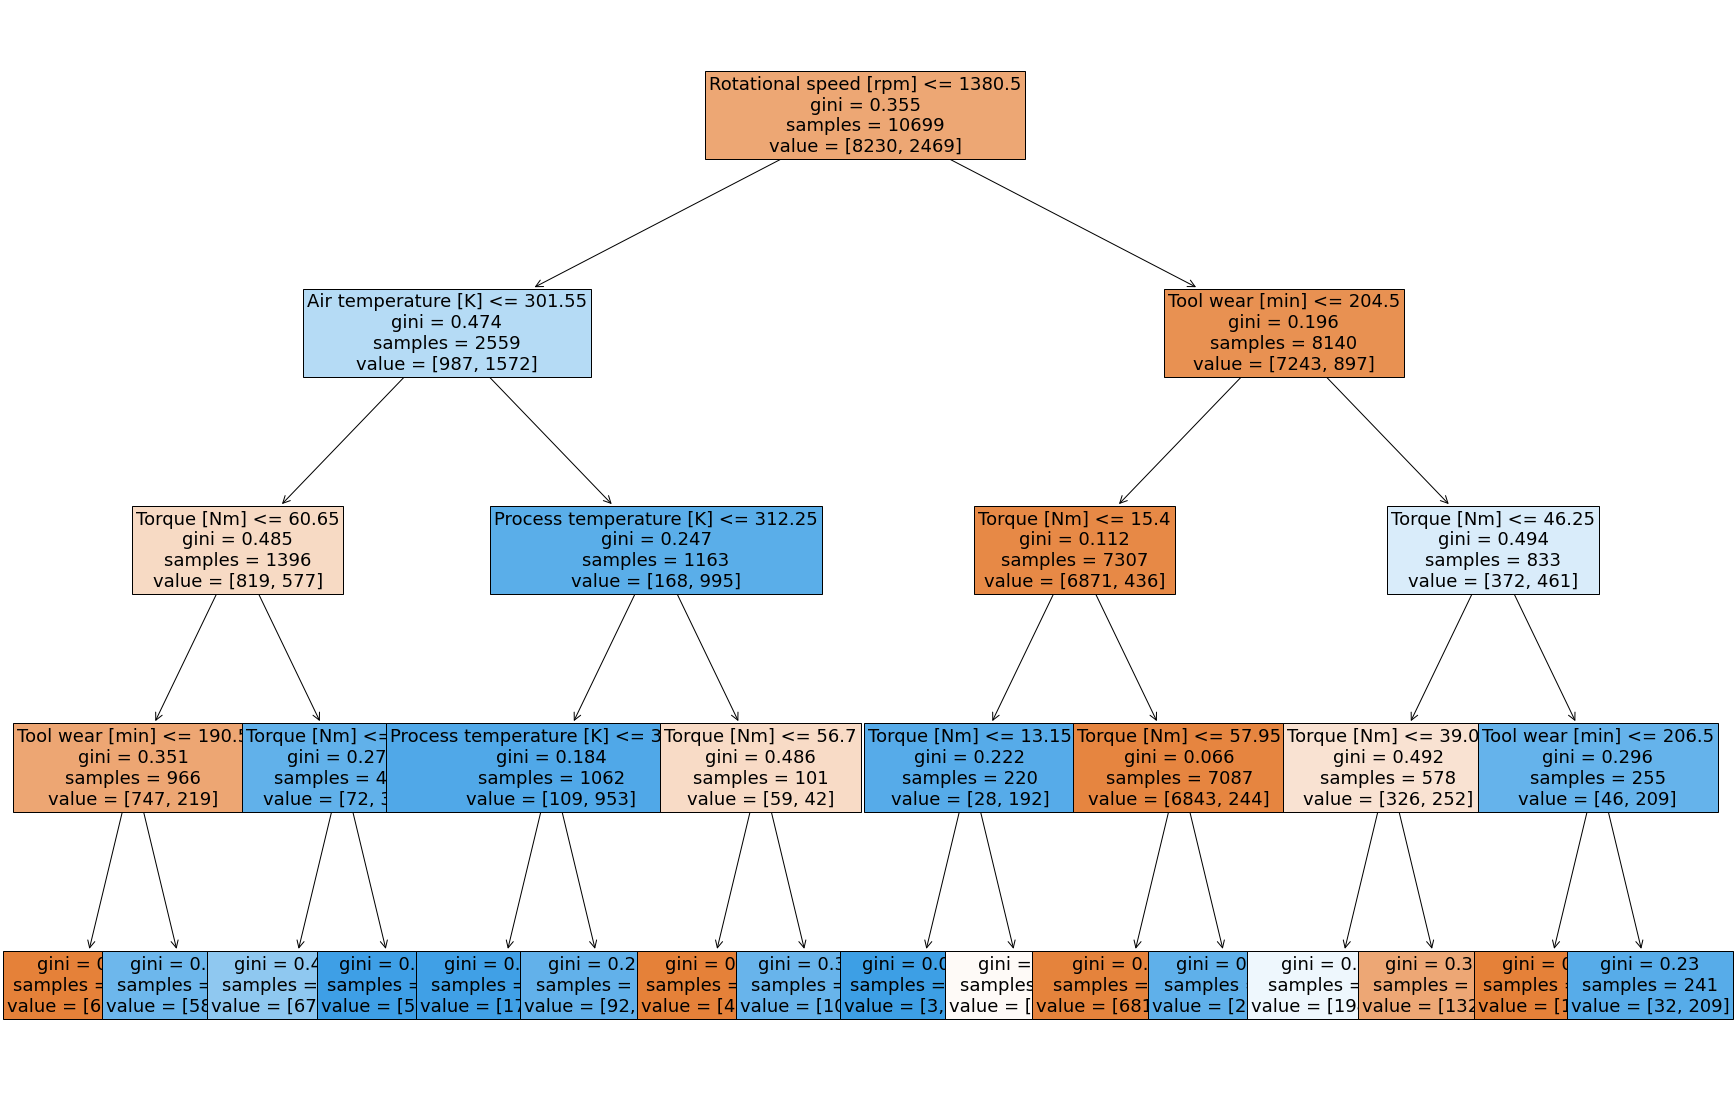

In [36]:
plt.figure(figsize=(30,20))
plot_tree(dt, max_depth=4, filled = True, feature_names=df.columns, fontsize = 18)
plt.show()

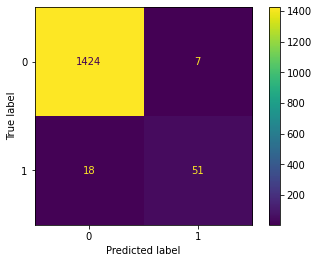

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1431
           1       0.88      0.74      0.80        69

    accuracy                           0.98      1500
   macro avg       0.93      0.87      0.90      1500
weighted avg       0.98      0.98      0.98      1500



In [32]:
# Random Forest

# Treinamento do Classificador (Utilizar o método .fit)
rf.fit(X_over, y_over)
pred_rf =rf.predict(X_test) ##Conjunto de Teste para predições
cm = confusion_matrix(y_test, pred_rf)
DspCM = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=rf.classes_)
DspCM.plot()
plt.show()

# Relatório

print(classification_report(y_test, pred_rf))

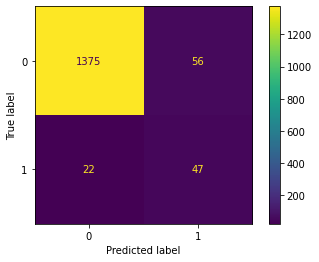

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1431
           1       0.46      0.68      0.55        69

    accuracy                           0.95      1500
   macro avg       0.72      0.82      0.76      1500
weighted avg       0.96      0.95      0.95      1500



In [34]:
# KNN

# Treinamento do Classificador (Utilizar o método .fit)
knn.fit(X_over_norm, y_over_norm)
pred_knn =knn.predict(X_test_norm) ##Conjunto de Teste para predições
cm = confusion_matrix(y_test, pred_knn)
DspCM = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=knn.classes_)
DspCM.plot()
plt.show()

# Relatório

print(classification_report(y_test, pred_knn))

## Sem Over Sampling

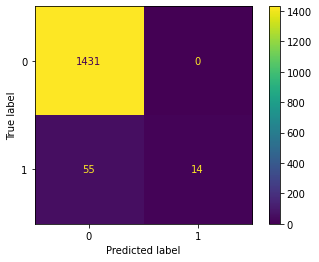

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1431
           1       1.00      0.20      0.34        69

    accuracy                           0.96      1500
   macro avg       0.98      0.60      0.66      1500
weighted avg       0.96      0.96      0.95      1500



In [37]:
# Decision Tree

# Treinamento do Classificador (Utilizar o método .fit)
dt.fit(X_train, y_train)
pred_dt =dt.predict(X_test) ##Conjunto de Teste para predições
cm = confusion_matrix(y_test, pred_dt)
DspCM = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=dt.classes_)
DspCM.plot()
plt.show()

# Relatório

print(classification_report(y_test, pred_dt))

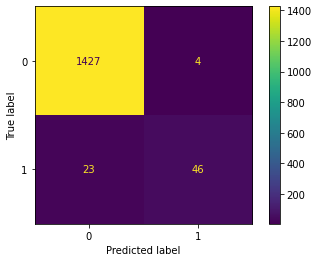

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1431
           1       0.92      0.67      0.77        69

    accuracy                           0.98      1500
   macro avg       0.95      0.83      0.88      1500
weighted avg       0.98      0.98      0.98      1500



In [38]:
# Random Forest

# Treinamento do Classificador (Utilizar o método .fit)
rf.fit(X_train, y_train)
pred_rf =rf.predict(X_test) ##Conjunto de Teste para predições
cm = confusion_matrix(y_test, pred_rf)
DspCM = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=rf.classes_)
DspCM.plot()
plt.show()

# Relatório

print(classification_report(y_test, pred_rf))

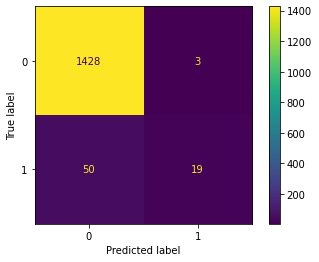

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1431
           1       0.86      0.28      0.42        69

    accuracy                           0.96      1500
   macro avg       0.91      0.64      0.70      1500
weighted avg       0.96      0.96      0.96      1500



In [41]:
# KNN

# Treinamento do Classificador (Utilizar o método .fit)
knn.fit(X_train_norm, y_train)
pred_knn =knn.predict(X_test_norm) ##Conjunto de Teste para predições
cm = confusion_matrix(y_test, pred_knn)
DspCM = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=knn.classes_)
DspCM.plot()
plt.show()

# Relatório

print(classification_report(y_test, pred_knn))